##Fashion_Mnist data 다중 분류 학습 하기 


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
import matplotlib.pyplot as plt 


In [ ]:
#data load
fashion_mnis = tf.keras.datasets.fashion_mnist

(train_x,train_y),(test_x,test_y) = fashion_mnis.load_data()

4423680/4422102 [==============================] - 0s 0us/step


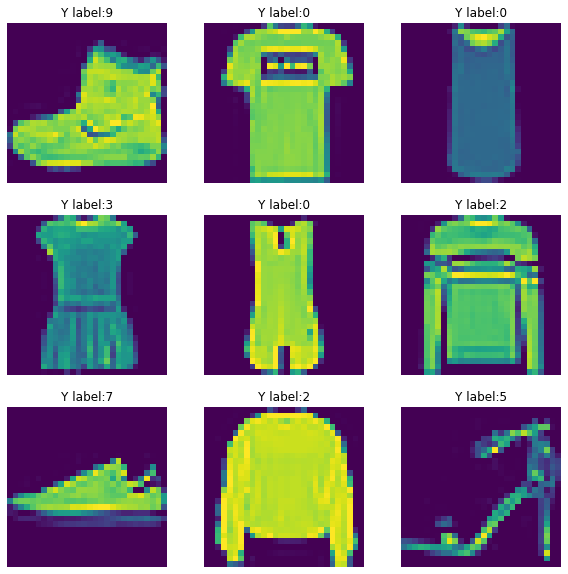

In [ ]:
plt.figure(figsize = (10,10))

for i in range(9):
  plt.subplot(3,3,i+1) #3x3 에 이미지를 보여줌 
  plt.title('Y label:{}'.format(train_y[i]))
  plt.axis('off') #축값을 사라지게 함
  plt.imshow(train_x[i]) #이미지를 보여주는

plt.show()

In [ ]:
#가로 세로의 2차원 데이터 를 보이고 있다 
train_x[0].shape #28*28
train_x[0].ndim #차원수 


2

In [ ]:
train_x.shape #28*28
train_x.ndim #차원수 
#전체의 차원수를 생각하면 3차원이다.

3

In [ ]:
#정규화 
np.min(train_x[0]),np.max(train_x[0])
train_x_norm = train_x / 255.0
test_x_norm = test_x/255.0

In [ ]:
print(np.min(train_x))
print(np.max(train_x))

0
255


In [ ]:
#신경망 만들기 
#model

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)), #차원을 바꿔주는 함수
                             tf.keras.layers.Dense(units = 128,activation = 'relu'),
                            tf.keras.layers.Dense(units = 64 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 32,activation = 'relu'),
                             tf.keras.layers.Dense(units = 10 ,activation = 'softmax'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss = 'SparseCategoricalCrossentropy',metrics = ['accuracy']) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x_norm, train_y,
                              epochs = 200, batch_size = 32,
                              validation_split = 0.2,
                      callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 5)
                              )

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9743 - val_loss: 0.7189 - val_accuracy: 0.8917
Epoch 2/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9762 - val_loss: 0.7544 - val_accuracy: 0.8864
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0612 - accuracy: 0.9775 - val_loss: 0.7704 - val_accuracy: 0.8846
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0645 - accuracy: 0.9761 - val_loss: 0.6787 - val_accuracy: 0.8903
Epoch 5/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9766 - val_loss: 0.7139 - val_accuracy: 0.8888
Epoch 6/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0633 - accuracy: 0.9764 - val_loss: 0.7568 - val_accuracy: 0.8879
Epoch 7/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0613 - accuracy: 0.9781 - val_loss: 0.6831 - val_ac

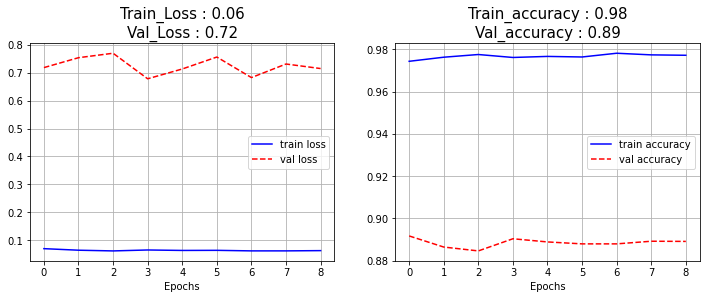

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val loss')
plt.xlabel('Epochs')

plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val accuracy')
plt.xlabel('Epochs')

plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.show()

In [ ]:
pred_y = model.predict(test_x)


In [ ]:
pred_y_round = np.round(pred_y,3)
print(pred_y_round[:5])


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
pred_y_argmax = np.argmax(pred_y_round , axis =1) 
print(pred_y_argmax[:10])

[9 2 1 1 6 1 4 6 5 7]


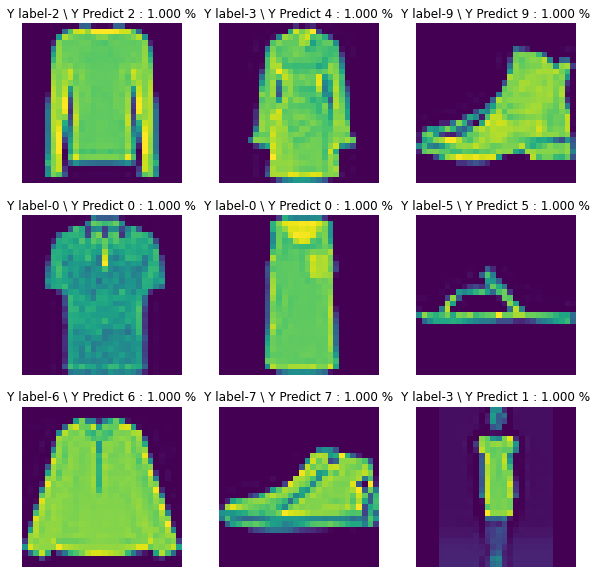

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)

    i = np.random.choice(range(0,10000))
    
    plt.title("Y label-{} \ Y Predict {} : {:.3f} %".\
              format(test_y[i], pred_y_argmax[i],np.max(pred_y_round[:][i])))
    plt.axis('off')
    plt.imshow(test_x[i])

plt.show()